<a href="https://colab.research.google.com/github/irachrist1/Mathematics-for-Machine-Learning-PCA_Formative/blob/main/PCA_Formative_Gentil_Iradukunda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)

**Names**: Iradukunda Christian Tonny Gentil

This notebook template guided me through the implementation of Principal Component Analysis (PCA). I Filled in the missing code and provided the required answers in the appropriate sections. I worked with the data that i got from Kaggle https://www.kaggle.com/datasets/lydia70/malaria-in-africa .

I made sure to display outputs for each code cell before submitting but for some reason if that didn't work you can refer from the link above and upload the dataset and re-run the notebook.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#load data
df = pd.read_csv('DatasetAfricaMalaria.csv')

print(len(df))
print(len(df.columns))
print(df.isnull().sum().sum())

594
27
4485


In [4]:
df.head()

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)


In [5]:
for col in df.columns:
    print(f"- {col}")

- Country Name
- Year
- Country Code
- Incidence of malaria (per 1,000 population at risk)
- Malaria cases reported
- Use of insecticide-treated bed nets (% of under-5 population)
- Children with fever receiving antimalarial drugs (% of children under age 5 with fever)
- Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)
- People using safely managed drinking water services (% of population)
- People using safely managed drinking water services, rural (% of rural population)
- People using safely managed drinking water services, urban (% of urban population)
- People using safely managed sanitation services (% of population)
- People using safely managed sanitation services, rural (% of rural population)
- People using safely managed sanitation services, urban  (% of urban population)
- Rural population (% of total population)
- Rural population growth (annual %)
- Urban population (% of total population)
- Urban population growth (annual %)
- People 

In [6]:
df.dtypes

,0
Country Name,object
Year,int64
Country Code,object
"Incidence of malaria (per 1,000 population at risk)",float64
Malaria cases reported,float64
Use of insecticide-treated bed nets (% of under-5 population),float64
Children with fever receiving antimalarial drugs (% of children under age 5 with fever),float64
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),float64
People using safely managed drinking water services (% of population),float64
"People using safely managed drinking water services, rural (% of rural population)",float64


In [7]:
df.describe()

,Year,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),...,Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude
count,594.000000,550.000000,5.500000e+02,132.000000,122.000000,106.000000,99.000000,88.000000,176.000000,132.000000,...,588.000000,588.000000,588.000000,566.000000,566.000000,588.000000,566.000000,566.000000,594.000000,594.000000
mean,2012.000000,190.087491,1.068330e+06,42.530303,30.201639,15.013958,33.478990,12.470568,51.549545,28.768939,...,43.164116,3.523061,65.994915,51.449576,84.268498,39.469796,28.077208,48.088375,2.828796,17.342546
std,3.164943,163.054527,2.192802e+06,20.157059,18.903198,12.389166,26.678321,10.078371,24.157416,18.631510,...,18.086118,1.456244,17.283361,18.927868,9.307285,26.304934,24.046725,21.802128,15.678226,20.041257
min,2007.000000,0.000000,0.000000e+00,1.000000,0.500000,0.000000,5.770000,0.930000,11.200000,6.370000,...,9.860000,-4.650000,28.960000,17.050000,52.010000,4.990000,1.890000,12.580000,-30.559482,-24.013197
25%,2009.000000,30.857500,2.211750e+03,26.675000,17.275000,5.763285,8.975000,4.185000,34.125000,16.532500,...,28.795000,2.512500,52.375000,37.075000,78.080000,18.197500,8.842500,30.775000,-6.369028,0.824782
50%,2012.000000,174.775000,1.130260e+05,42.900000,29.300000,11.500000,28.390000,10.675000,51.365000,25.410000,...,41.560000,3.730000,64.470000,50.435000,85.420000,32.555000,18.815000,44.695000,6.744051,18.611308
75%,2015.000000,347.637500,1.154808e+06,56.325000,42.625000,21.850000,43.890000,16.887500,70.747500,35.725000,...,56.945000,4.450000,79.165000,62.245000,90.082500,54.810000,38.082500,58.845000,12.862807,31.465866
max,2017.000000,585.540000,1.682113e+07,95.500000,76.900000,59.600000,92.660000,39.930000,89.540000,78.120000,...,88.980000,7.400000,99.870000,99.830000,99.920000,100.000000,95.180000,98.300000,33.886917,57.552152


In [8]:
# understanding the missing values
print("missing values per column:")
print(df.isnull().sum())
print()
print(f"total cells: {df.shape[0] * df.shape[1]}")
print(f"missing cells: {df.isnull().sum().sum()}")
print(f"percentage missing: {df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100:.1f}%")

missing values per column:
Country Name                                                                                 0
Year                                                                                         0
Country Code                                                                                 0
Incidence of malaria (per 1,000 population at risk)                                         44
Malaria cases reported                                                                      44
Use of insecticide-treated bed nets (% of under-5 population)                              462
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    472
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      488
People using safely managed drinking water services (% of population)                      495
People using safely managed drinking water services, rural (% of rural population)         506
People using safely man

In [9]:
# what countries are in the data?
print("countries:", df['Country Name'].nunique())
print(df['Country Name'].unique()[:10])

# what years?
print("\\nyears:", df['Year'].min(), "to", df['Year'].max())

countries: 54
['Algeria' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cameroon' 'Central African Republic' 'Chad']
\nyears: 2007 to 2017


In [10]:
df2 = df.drop(['Country Name', 'Country Code', 'geometry'], axis=1)

for col in df2.columns:
  missing = df2[col].isnull().sum()
  pct = missing / len(df2) *100

  if pct > 0:
    print(f"{col}: {pct:.1f}% missing")

Incidence of malaria (per 1,000 population at risk): 7.4% missing
Malaria cases reported: 7.4% missing
Use of insecticide-treated bed nets (% of under-5 population): 77.8% missing
Children with fever receiving antimalarial drugs (% of children under age 5 with fever): 79.5% missing
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women): 82.2% missing
People using safely managed drinking water services (% of population): 83.3% missing
People using safely managed drinking water services, rural (% of rural population): 85.2% missing
People using safely managed drinking water services, urban (% of urban population): 70.4% missing
People using safely managed sanitation services (% of population): 77.8% missing
People using safely managed sanitation services, rural (% of rural population): 81.5% missing
People using safely managed sanitation services, urban  (% of urban population): 77.8% missing
Rural population (% of total population): 1.0% missing
Rural popu

In [11]:
bad_cols = []
for col in df2.columns:
  pct = df2[col].isnull().sum() /len(df2) * 100
  if pct > 70:
    bad_cols.append(col)

df2 = df2.drop(bad_cols, axis=1)
print(f"dropped {len(bad_cols)} columns")

for col in df2.columns:
  if df2[col].isnull().sum() > 0:
    mean_val = df2[col].mean()
    df2[col]= df2[col].fillna(mean_val)

data = df2.values
feature_names = df2.columns.tolist()

print(f"final shape: {data.shape}")
print(f"missing left {np.isnan(data).sum()}")

dropped 9 columns
final shape: (594, 15)
missing left 0


### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

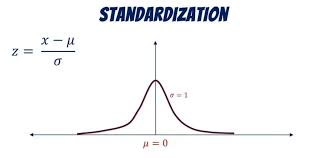


In [12]:
# formula z= (x -mean) / std

mean = np.mean(data, axis=0)
std = np.std(data, axis=0)

standardized_data = (data - mean) / std

print("mean first col:", standardized_data[:,0].mean())
print("std first col:", standardized_data[:,0].std())

# Step 1: Load and Standardize the data (use of numpy only allowed)
# standardized_data = None  # Do not use sklearn (Data - Data Mean)/ Data's Standard Deviation
standardized_data[:5]  # Display the first few rows of standardized data

mean first col: 0.0
std first col: 1.0


array([[-1.58113883, -1.21256459, -0.50676022, -1.23400095, -1.66809102,
         1.23397271, -0.56164688,  1.4949511 ,  1.86242385,  1.15800583,
         1.77365688,  2.08348956,  1.99788845,  1.60900436, -0.78319128],
       [-1.58113883,  0.61644942,  0.22065066, -0.79850359,  0.43654858,
         0.79847029,  1.02714839, -1.04968763, -1.49943184, -2.0312881 ,
        -0.08450631, -0.60024644,  0.2987136 , -0.89572088,  0.02653472],
       [-1.58113883,  1.85097486, -0.50677256,  0.08917686,  0.50362873,
        -0.08922047,  0.39163028, -0.12891488,  0.18799653, -0.88446427,
        -1.05813946, -1.01427689, -1.20999189,  0.41358982, -0.75042082],
       [-1.58113883, -1.20605768, -0.50658756, -0.82130741, -2.37243257,
         0.82127437,  0.88208447,  0.75053369,  0.33317496,  1.11063462,
         0.84629616,  0.50795659,  1.37380734, -1.6059517 ,  0.36666905],
       [-1.58113883,  2.00127157, -0.48578404,  1.12146692,  0.64617404,
        -1.12152249,  1.64885089, -0.79883234, 

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [13]:
# Step 3: Calculate the Covariance Matrix

n = len(standardized_data)
cov_matrix = np.dot(standardized_data.T, standardized_data) / n

print(cov_matrix.shape)
cov_matrix


(15, 15)


array([[ 1.00000000e+00, -6.79397111e-02,  3.57344598e-01,
        -8.38964764e-02, -4.96520654e-02,  8.38983820e-02,
        -5.64365429e-02,  1.18366139e-01,  1.10692373e-01,
         1.00607770e-01,  6.82650503e-02,  6.82878736e-02,
         5.86022010e-02,  2.10269512e-19,  2.24287480e-18],
       [-6.79397111e-02,  1.00000000e+00,  2.88508868e-01,
         2.45033582e-01,  3.86487468e-01, -2.45037074e-01,
         3.09098444e-01, -3.68291461e-01, -3.12956505e-01,
        -3.98343690e-01, -4.40241476e-01, -3.75168318e-01,
        -4.25231363e-01,  5.87023367e-02, -2.64429307e-01],
       [ 3.57344598e-01,  2.88508868e-01,  1.00000000e+00,
         2.12978219e-01,  2.39829984e-01, -2.12986894e-01,
         2.52005524e-01, -2.32057702e-01, -1.80305463e-01,
        -1.67308199e-01, -1.74811045e-01, -1.14152367e-01,
        -2.08237885e-01, -8.63990301e-02,  6.67397627e-02],
       [-8.38964764e-02,  2.45033582e-01,  2.12978219e-01,
         1.00000000e+00,  6.51653290e-01, -9.99999989

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [14]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real

print("eigenvalues:", eigenvalues)

eigenvalues: [6.23843997e+00 2.09639870e+00 1.40055656e+00 1.28829661e+00
 9.15775425e-01 7.76291690e-01 6.87624287e-01 4.43359017e-01
 3.95216010e-01 2.79092787e-01 2.30005123e-01 1.36530342e-01
 1.04995345e-01 7.41813124e-03 1.06740894e-08]


### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [15]:
# Step 5: Sort Principal Components

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues_val = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

total = sum(sorted_eigenvalues_val)
variance_explained = sorted_eigenvalues_val / total

cumulative = np.cumsum(variance_explained)

for i in range(len(sorted_eigenvalues_val)):
  print(f"PC{i+1}: {variance_explained[i]*100:.2f}% (cumulative {cumulative[i]*100:.2f}%)")

PC1: 41.59% (cumulative 41.59%)
PC2: 13.98% (cumulative 55.57%)
PC3: 9.34% (cumulative 64.90%)
PC4: 8.59% (cumulative 73.49%)
PC5: 6.11% (cumulative 79.60%)
PC6: 5.18% (cumulative 84.77%)
PC7: 4.58% (cumulative 89.36%)
PC8: 2.96% (cumulative 92.31%)
PC9: 2.63% (cumulative 94.95%)
PC10: 1.86% (cumulative 96.81%)
PC11: 1.53% (cumulative 98.34%)
PC12: 0.91% (cumulative 99.25%)
PC13: 0.70% (cumulative 99.95%)
PC14: 0.05% (cumulative 100.00%)
PC15: 0.00% (cumulative 100.00%)


### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [16]:
# Step 6: Project Data onto Principal Components

num_components = 0

for i in range(len(cumulative)):
  if cumulative[i] >= 0.90:
    num_components = i + 1
    break

print(f"keeping {num_components} components")
print(f"this gives us {cumulative[num_components-1]*100:.0f}% of the variance")

W = sorted_eigenvectors[:, :num_components]
# The multiplication in np.dot expects compatible shapes. standardized_data.shape returns a tuple (rows, cols).
# To project the data, we should use standardized_data itself, not its shape.
reduced_data = np.dot(standardized_data, W)

print(f"original: {standardized_data.shape}")
print(f"reduced: {reduced_data.shape}")

reduced_data[:5]

keeping 8 components
this gives us 92% of the variance
original: (594, 15)
reduced: (594, 8)


array([[-5.03478331,  0.8134073 ,  0.48809336,  1.57560026, -0.69339686,
        -0.81829343,  0.76822199, -0.77979876],
       [ 1.77020306,  1.23366215,  1.49625858, -0.82494281, -1.0482952 ,
        -2.01584144, -0.03000303,  0.20164246],
       [ 1.97784333,  1.46808517,  0.687551  ,  1.3413141 ,  1.13830659,
        -0.83972723, -0.82819404, -0.19635184],
       [-2.69270776, -0.32940033,  1.96021261, -1.02979073,  0.78850342,
        -1.54520413,  1.7613379 , -0.05211572],
       [ 2.85291137,  0.93583042,  0.30139282,  2.10117525,  0.40102554,
        -1.30327191,  0.36326271,  0.65597075]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [17]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (594, 8)


array([[-5.03478331,  0.8134073 ,  0.48809336,  1.57560026, -0.69339686,
        -0.81829343,  0.76822199, -0.77979876],
       [ 1.77020306,  1.23366215,  1.49625858, -0.82494281, -1.0482952 ,
        -2.01584144, -0.03000303,  0.20164246],
       [ 1.97784333,  1.46808517,  0.687551  ,  1.3413141 ,  1.13830659,
        -0.83972723, -0.82819404, -0.19635184],
       [-2.69270776, -0.32940033,  1.96021261, -1.02979073,  0.78850342,
        -1.54520413,  1.7613379 , -0.05211572],
       [ 2.85291137,  0.93583042,  0.30139282,  2.10117525,  0.40102554,
        -1.30327191,  0.36326271,  0.65597075]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

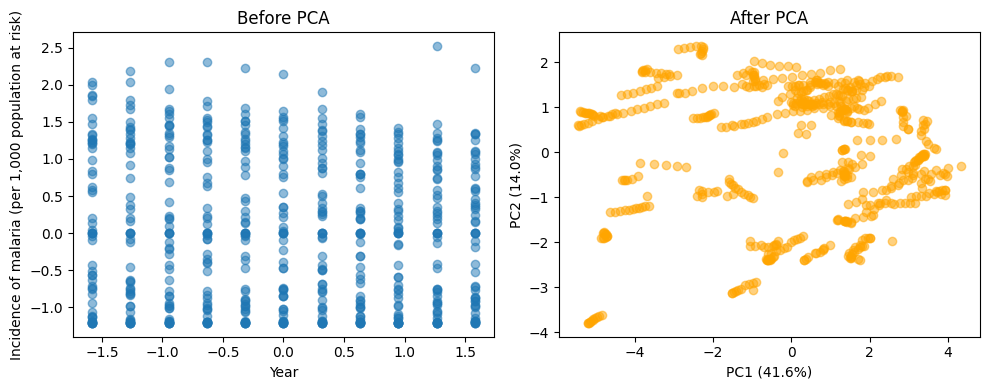

In [18]:
# Step 8: Visualize Before and After PCA


# Plot original data (first two features for simplicity)
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(standardized_data[:, 0], standardized_data [:, 1], alpha=0.5)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Before PCA')

# Plot reduced data after PCA

plt.subplot(1,2,2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5, color='orange')
plt.xlabel(f'PC1 ({variance_explained[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({variance_explained[1]*100:.1f}%)')
plt.title('After PCA')

plt.tight_layout()
plt.show()